In [61]:
# pip install langdetect

### Loading the Libraries

In [1]:
import os
import json
import requests

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import time
import string

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
import bson.json_util as json_util

In [8]:
from dotenv import load_dotenv

In [9]:
from pandas.io.json import json_normalize

In [10]:
from datetime import datetime

In [11]:
from langdetect import detect

##### nltk essentials

In [122]:
import nltk

In [70]:
# for text normalize
from nltk import word_tokenize
from nltk.corpus import stopwords

In [120]:
# for analysis
from nltk.collocations import *

### Global variables

In [12]:
path = os.path.expanduser("../data/")

load_dotenv(os.path.join(path, ".env"))

True

In [13]:
# environment variables
USER = os.getenv("GIT_USERNAME")

KEY = os.getenv("GIT_PASSWORD")

ID = os.getenv("GIT_CLIENT_ID")

SECRET = os.getenv("GIT_CLIENT_SECRET")

ACCESS = os.getenv("GIT_ACCESS_TOKEN")

In [14]:
# all url's
SEARCH_URL = "https://github.com/search" 

note = "my test application"

MAIN = "https://github.com"

## Functions

In [14]:
## a function to paginate through github repos
def search_repo_paging(qry):
    url = "https://api.github.com/search/repositories"
    pms = {"q":qry, "sort":"forks", "order":"desc", "per_page":100}
    while True:
        res = requests.get(url, params=pms)
        result = res.json()
        print(f"Connection status:{res}")
        results.extend(result["items"])
        print(f"Just download: {len(result['items'])}, Total:{len(results)}")
        params = {}
        
        try:
            url = res.links["next"]["url"]
        except:
            break
            
        time.sleep(10)

In [15]:
# a function to normalize the data
def df_from_data(data):
    sanitized = json.loads(json_util.dumps(results))
    normalized = json_normalize(sanitized)
    return pd.DataFrame(normalized)

In [16]:
# a func to detect language of string
def detect_lang(st):
    try:
        return detect(st)
    except:
        return None

In [17]:
## text normalization 
def clean_text(text=" ", stopwords = []):
    punc = list(string.punctuation)
    
    tokens = word_tokenize(text.strip())
    clean = [wrd.lower() for wrd in tokens]
    clean = [wrd for wrd in clean if wrd not in stopwords]
    clean = [wrd.strip("".join(punc)) for wrd in clean if wrd not in punc]
    
    return " ".join(clean)

In [102]:
# clean_text(new_df["description"].to_list()[0])

### API

In [18]:
## requesting all available Url's
res = requests.get("https://api.github.com/")

In [19]:
URL = res.json()
AUTH_URL = URL["authorizations_url"]
AUTH_URL

'https://api.github.com/authorizations'

In [114]:
## paginating github data
# results of 19
results=[]
search_repo_paging("created:2019-01-01..2019-12-31")

Connection status:<Response [200]>
Just download: 100, Total:100
Connection status:<Response [200]>
Just download: 100, Total:200
Connection status:<Response [200]>
Just download: 100, Total:300
Connection status:<Response [200]>
Just download: 100, Total:400
Connection status:<Response [200]>
Just download: 100, Total:500
Connection status:<Response [200]>
Just download: 100, Total:600
Connection status:<Response [200]>
Just download: 100, Total:700
Connection status:<Response [200]>
Just download: 100, Total:800
Connection status:<Response [200]>
Just download: 100, Total:900
Connection status:<Response [200]>
Just download: 100, Total:1000


In [116]:
results[0]["created_at"]

'2019-03-26T07:31:14Z'

In [121]:
# results of year 2020
results= []
search_repo_paging("created:>2020-01-01")

Connection status:<Response [200]>
Just download: 100, Total:100
Connection status:<Response [200]>
Just download: 100, Total:200
Connection status:<Response [200]>
Just download: 100, Total:300
Connection status:<Response [200]>
Just download: 100, Total:400
Connection status:<Response [200]>
Just download: 100, Total:500
Connection status:<Response [200]>
Just download: 100, Total:600
Connection status:<Response [200]>
Just download: 100, Total:700
Connection status:<Response [200]>
Just download: 100, Total:800
Connection status:<Response [200]>
Just download: 100, Total:900
Connection status:<Response [200]>
Just download: 100, Total:1000


## Data Pull

In [120]:
# getting data frame from 2019 data
df19 = df_from_data(results)
df19.head(2)

,id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,...,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license
0,177736533,MDEwOlJlcG9zaXRvcnkxNzc3MzY1MzM=,996.ICU,996icu/996.ICU,False,https://github.com/996icu/996.ICU,Repo for counting stars and contributing. Pres...,False,https://api.github.com/repos/996icu/996.ICU,https://api.github.com/repos/996icu/996.ICU/forks,...,https://api.github.com/users/996icu/events{/pr...,https://api.github.com/users/996icu/received_e...,User,False,other,Other,NOASSERTION,None,MDc6TGljZW5zZTA=,NaN
1,228683419,MDEwOlJlcG9zaXRvcnkyMjg2ODM0MTk=,it-cert-automation-practice,google/it-cert-automation-practice,False,https://github.com/google/it-cert-automation-p...,Google IT Automation with Python Professional ...,False,https://api.github.com/repos/google/it-cert-au...,https://api.github.com/repos/google/it-cert-au...,...,https://api.github.com/users/google/events{/pr...,https://api.github.com/users/google/received_e...,Organization,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NaN


In [122]:
# getting data frame from 2020 data
df20 = df_from_data(results)
df20.head(2)

,id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,...,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license
0,272411321,MDEwOlJlcG9zaXRvcnkyNzI0MTEzMjE=,IBMYes,CCChieh/IBMYes,False,https://github.com/CCChieh/IBMYes,None,False,https://api.github.com/repos/CCChieh/IBMYes,https://api.github.com/repos/CCChieh/IBMYes/forks,...,https://api.github.com/users/CCChieh/events{/p...,https://api.github.com/users/CCChieh/received_...,User,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NaN
1,261787758,MDEwOlJlcG9zaXRvcnkyNjE3ODc3NTg=,design-resources-for-developers,bradtraversy/design-resources-for-developers,False,https://github.com/bradtraversy/design-resourc...,Curated list of design and UI resources from s...,False,https://api.github.com/repos/bradtraversy/desi...,https://api.github.com/repos/bradtraversy/desi...,...,https://api.github.com/users/bradtraversy/even...,https://api.github.com/users/bradtraversy/rece...,User,False,mit,MIT License,MIT,https://api.github.com/licenses/mit,MDc6TGljZW5zZTEz,NaN


In [182]:
col_lst = ["description", "stargazers_count", "watchers_count", "size", "forks", 
           "open_issues_count", "language", "score", "created_at"]

subset19 = df19[col_lst]
subset20 = df20[col_lst]

In [183]:
subset19.head(2)

,description,stargazers_count,watchers_count,size,forks,open_issues_count,language,score,created_at
0,Repo for counting stars and contributing. Pres...,253118,253118,183401,21126,16789,Rust,1.0,2019-03-26T07:31:14Z
1,Google IT Automation with Python Professional ...,252,252,12,13273,9123,Python,1.0,2019-12-17T19:04:12Z


In [184]:
subset20.head(2)

,description,stargazers_count,watchers_count,size,forks,open_issues_count,language,score,created_at
0,None,1773,1773,44692,13100,161,Batchfile,1.0,2020-06-15T10:40:25Z
1,Curated list of design and UI resources from s...,23098,23098,4260,5657,0,None,1.0,2020-05-06T14:40:35Z


In [186]:
## saving the subset
subset19.to_csv("../data/gh19-data.csv")
subset20.to_csv("../data/gh20-data.csv")

In [12]:
## loading the subset-data
subset19 = pd.read_csv("../data/gh19-data.csv", index_col=0)
subset20 = pd.read_csv("../data/gh20-data.csv", index_col=0)

## Data Preprocessing

### Textual Data
- English represents 71% of repositories in 2019 &  76% in 2020
-In 2020,
    - Watchers count varies from o to 23,098. and Forks from 107 to 5,657
    - The first quartile of repos has no open issues while top 25% have more than 32
    - The max no of issues are 1996
-In 2019,
    - Watchers count varies from o to 2,53,118 and Forks from 208 to 21,126
    - The first quartile of repos has no open issues while top 25% have more than 61
    - The max no of issues are 16,789

In [16]:
## dropping all na values
new_df19 = subset19.dropna(subset=["description"])
new_df20 = subset20.dropna(subset=["description"])

In [23]:
## detecting the language 
new_df19["lang"] = new_df19.apply(lambda x:detect_lang(x["description"]), axis=1)
new_df20["lang"] = new_df20.apply(lambda x:detect_lang(x["description"]), axis=1)

In [29]:
print(f"""2020: {round((new_df20['lang'] == 'en').sum()/ len(new_df20['lang'])*100)}
2019: {round((new_df19['lang'] == 'en').sum()/ len(new_df20['lang'])*100)}""")

2020: 71
2019: 76


In [30]:
## selecting only english language
new_df19 = new_df19[new_df19["lang"] == 'en']
new_df20 = new_df20[new_df20["lang"] == 'en']

In [36]:
## cleaning description
new_df19["clean"] = new_df19["description"].apply(str)
new_df19["clean"] = new_df19["clean"].apply(lambda x:clean_text(text=x, stopwords=stopwords.words("english")))

new_df20["clean"] = new_df20["description"].apply(str)
new_df20["clean"] = new_df20["clean"].apply(lambda x:clean_text(text=x, stopwords=stopwords.words("english")))

##### Trends in Numerical Vars

In [37]:
new_df19[["stargazers_count", "watchers_count", "size", "forks", "open_issues_count"]].describe()

,stargazers_count,watchers_count,size,forks,open_issues_count
count,562.000000,562.000000,5.620000e+02,562.000000,562.000000
mean,3011.451957,3011.451957,4.814932e+04,822.019573,113.314947
std,11358.875337,11358.875337,2.236437e+05,1491.904407,820.674416
min,0.000000,0.000000,0.000000e+00,208.000000,0.000000
25%,391.750000,391.750000,7.870000e+02,304.250000,4.250000
50%,1264.500000,1264.500000,4.298000e+03,419.500000,16.000000
75%,2887.250000,2887.250000,2.339950e+04,705.500000,61.000000
max,253118.000000,253118.000000,3.909293e+06,21126.000000,16789.000000


In [38]:
new_df20[["stargazers_count", "watchers_count", "size", "forks", "open_issues_count"]].describe()

,stargazers_count,watchers_count,size,forks,open_issues_count
count,525.000000,525.000000,5.250000e+02,525.000000,525.000000
mean,1181.822857,1181.822857,7.550454e+04,339.487619,43.754286
std,2173.900020,2173.900020,4.070703e+05,471.768548,139.131832
min,0.000000,0.000000,1.000000e+00,107.000000,0.000000
25%,82.000000,82.000000,4.980000e+02,145.000000,2.000000
50%,436.000000,436.000000,3.909000e+03,192.000000,8.000000
75%,1282.000000,1282.000000,2.424600e+04,280.000000,32.000000
max,23098.000000,23098.000000,7.123950e+06,5657.000000,1996.000000


## Data Analysis

### Questions
- Detect the most trending topics/technologies based on descriptions
- Identify the most popular programming languages globally
- Find out what programming languages are used for the top technologies
- What are the differences between technologies in terms of repository size, open
  issues, number of forks, and watchers
- See what are the most popular projects and top technology in 2017


### Answers
- Trending technology of 
        2020 => open-source 
        2019 => deep-learning & machine-learning
- Popular programming language in the past
        5 years => Python, JavaScript & Java
        3 years => Python
    - ruby has seen a downfall 
    
##### Technology by
- **Programming Languages**
    - we get `nan` as one of the input as some od the technologies are built with multiple programming languages 
    - **Python** is the most common language and secondly *java* and *javascript*
    - open source is diverse(all most every popular language} and popular
    - people practice python, java, shell and others

- **Repositories**
    - most of the top repos are tutorials, papers and resources
    - There are also projects equal as tutorials
    - Open source provides mainly apps and courses
- **Numerical Data** (fork_count, watchers_count, stargazers_count, size and open_issue_count)
    - Deep learning is more reach on mean, min and max. Nevertheless open source is also gaining more forks
    - **_Comparing Numericals_**
        - watchers and stars are highly correlated (may be 1).Hence,droping stars
        - forks VS open issues
            - Majority of open issues has less forks even they are high in value and vice versa
            - No correlation (since all dots concentrated at bottom left)
        - forks VS size  
            - In the case of deep learning, the repos with higher no of size are less in size
            -  No correlation (since all dots concentrated at bottom left)
        - forks VS watchers
            - Even the no of watchers keep increasing, the no of forks remains in range of 0 to 2000
            - Some repos has highre no of forks but with low watchers in case of deep learning
        - open issues VS size
            - In both deep learning and open sources, there are mix of large sized projects and small sized projects
            - But there is  no correlation
        - open issues VS watchers
            - A bunch of repos are clustered at 0 -6000 watchers
            - not correlation 
        - watchers VS size
            - majoriy of repos doesn't go beyong 0.25
            - no correlation again

##### Trending topics of 2020

In [41]:
# convert clean descrpitons to list of tokens
list_doc = new_df20["clean"].apply(lambda x:x.split()).to_list()

## Anlaysis on docs
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents(list_doc)

bigram_finder.apply_freq_filter(3)

bigrams = bigram_finder.nbest(bigram_measures.raw_freq, 20)
bigrams

[('open', 'source'),
 ('source', 'code'),
 ('machine', 'learning'),
 ('hacktoberfest', '2020'),
 ('repository', 'contains'),
 ('data', 'science'),
 ('curated', 'list'),
 ('html', 'css'),
 ('made', 'specifically'),
 ('pull', 'request'),
 ('deep', 'learning'),
 ('science', 'hacks'),
 ('pull', 'requests'),
 ('30', 'days'),
 ('android', 'app'),
 ('android', 'ios'),
 ('app', 'source'),
 ('contributions', 'hacktoberfest'),
 ('contributions', 'made'),
 ('create', 'pull')]

In [51]:
## scores by raw_freq
scores = bigram_finder.score_ngrams(bigram_measures.raw_freq)
scores[:10]

[(('open', 'source'), 0.005988023952095809),
 (('source', 'code'), 0.0029940119760479044),
 (('machine', 'learning'), 0.002780153977758768),
 (('hacktoberfest', '2020'), 0.00213857998289136),
 (('repository', 'contains'), 0.00213857998289136),
 (('data', 'science'), 0.001924721984602224),
 (('curated', 'list'), 0.0014970059880239522),
 (('html', 'css'), 0.0014970059880239522),
 (('made', 'specifically'), 0.0014970059880239522),
 (('pull', 'request'), 0.0014970059880239522)]

In [45]:
## Visualizing ngrams
# calculating no of occurences
ngram = list(bigram_finder.ngram_fd.items())
ngram.sort(key=lambda item:item[-1], reverse=True)

# creating tuples from ngram
frequency = [(" ".join(k), v) for k,v in ngram]

df = pd.DataFrame(frequency)
df.set_index([0], inplace=True)
df.head()

,1
0,
open source,28
source code,14
machine learning,13
hacktoberfest 2020,10
repository contains,10


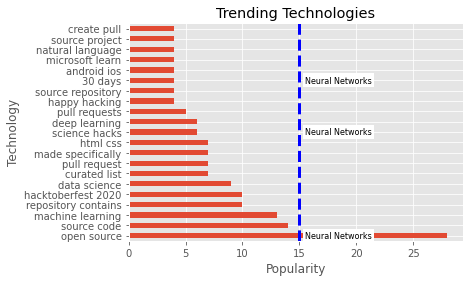

In [52]:
## plottting the frequency
plt.style.use("ggplot")

df.sort_values(by=[1], ascending=False).head(21).plot(kind="barh")

plt.title("Trending Technologies in 2020")
plt.ylabel("Technology")
plt.xlabel("Popularity")
plt.legend().set_visible(False)

plt.axvline(x=15, color="b", label="Average", linestyle="--", linewidth=3)
for custom in [0, 10, 15]:
    plt.text(15.5, custom, "Neural Networks", fontsize=8, va="center", bbox=dict(boxstyle="square", fc="white", ec="none"))
    
plt.show() 

#####  Trending Technologies in 2019

In [53]:
# convert clean descrpitons to list of tokens
list_doc = new_df19["clean"].apply(lambda x:x.split()).to_list()

## Anlaysis on docs
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents(list_doc)

bigram_finder.apply_freq_filter(3)

bigrams = bigram_finder.nbest(bigram_measures.raw_freq, 20)
bigrams

[('deep', 'learning'),
 ('machine', 'learning'),
 ('open', 'source'),
 ('starter', 'code'),
 ('guided', 'project'),
 ('object', 'detection'),
 ('complete', 'flutter'),
 ('data', 'science'),
 ('github', 'actions'),
 ('best', 'practices'),
 ('jekyll', 'theme'),
 ('natural', 'language'),
 ('project', 'complete'),
 ('pytorch', 'implementation'),
 ('tensorflow', '2'),
 ('azure', 'devops'),
 ('development', 'bootcamp'),
 ('react', 'native'),
 ('code', 'used'),
 ('course', 'files')]

In [54]:
## scores by raw_freq
scores = bigram_finder.score_ngrams(bigram_measures.raw_freq)
scores[:10]

[(('deep', 'learning'), 0.0041942604856512146),
 (('machine', 'learning'), 0.003532008830022075),
 (('open', 'source'), 0.002869757174392936),
 (('starter', 'code'), 0.002869757174392936),
 (('guided', 'project'), 0.001986754966887417),
 (('object', 'detection'), 0.001986754966887417),
 (('complete', 'flutter'), 0.0017660044150110375),
 (('data', 'science'), 0.0017660044150110375),
 (('github', 'actions'), 0.0017660044150110375),
 (('best', 'practices'), 0.0013245033112582781)]

In [55]:
## Visualizing ngrams
# calculating no of occurences
ngram = list(bigram_finder.ngram_fd.items())
ngram.sort(key=lambda item:item[-1], reverse=True)

# creating tuples from ngram
frequency = [(" ".join(k), v) for k,v in ngram]

df = pd.DataFrame(frequency)
df.set_index([0], inplace=True)
df.head()

,1
0,
deep learning,19
machine learning,16
starter code,13
open source,13
guided project,9


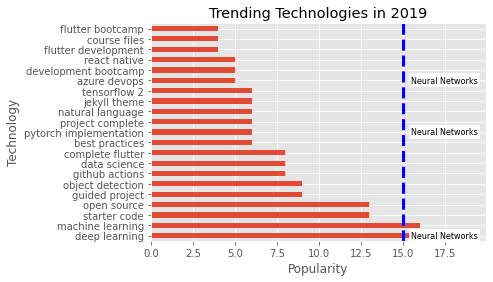

In [56]:
## plottting the frequency
plt.style.use("ggplot")

df.sort_values(by=[1], ascending=False).head(21).plot(kind="barh")

plt.title("Trending Technologies in 2019")
plt.ylabel("Technology")
plt.xlabel("Popularity")
plt.legend().set_visible(False)

plt.axvline(x=15, color="b", label="Average", linestyle="--", linewidth=3)
for custom in [0, 10, 15]:
    plt.text(15.5, custom, "Neural Networks", fontsize=8, va="center", bbox=dict(boxstyle="square", fc="white", ec="none"))
    
plt.show() 

In [ ]:
# --- others methods to find scores ---
## scores by pmi
# scores_pmi = bigram_finder.score_ngrams(bigram_measures.pmi)
# scores_pmi[:10]

## scores by student_t
# scores_st = bigram_finder.score_ngrams(bigram_measures.student_t)
# scores_st[:10]

## scores by chi-sq
# scores_chi_sq = bigram_finder.score_ngrams(bigram_measures.chi_sq)
# scores_chi_sq[:10]

#### Programming languages

In [22]:
## paginating github for data
qs =["created:>2020-01-01", "created:2019-01-01..2019-12-31", "created:2018-01-01..2018-12-31", 
     "created:2017-01-01..2017-12-31", "created:2016-01-01..2016-12-31"]

df = pd.DataFrame()

for q in qs:  
    results=[]
    search_repo_paging(q)
    data = results
    data = pd.io.json.json_normalize(data)
    df = pd.concat([df, data])
    print("-------------")
    print(df.shape)
    print("\n")

Connection status:<Response [200]>
Just download: 100, Total:100
Connection status:<Response [200]>
Just download: 100, Total:200
Connection status:<Response [200]>
Just download: 100, Total:300
Connection status:<Response [200]>
Just download: 100, Total:400
Connection status:<Response [200]>
Just download: 100, Total:500
Connection status:<Response [200]>
Just download: 100, Total:600
Connection status:<Response [200]>
Just download: 100, Total:700
Connection status:<Response [200]>
Just download: 100, Total:800
Connection status:<Response [200]>
Just download: 100, Total:900
Connection status:<Response [200]>
Just download: 100, Total:1000
-------------
(1000, 96)


Connection status:<Response [200]>
Just download: 100, Total:100
Connection status:<Response [200]>
Just download: 100, Total:200
Connection status:<Response [200]>
Just download: 100, Total:300
Connection status:<Response [200]>
Just download: 100, Total:400
Connection status:<Response [200]>
Just download: 100, Total:5

In [23]:
df.head()

,id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,...,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license
0,272411321,MDEwOlJlcG9zaXRvcnkyNzI0MTEzMjE=,IBMYes,CCChieh/IBMYes,False,https://github.com/CCChieh/IBMYes,None,False,https://api.github.com/repos/CCChieh/IBMYes,https://api.github.com/repos/CCChieh/IBMYes/forks,...,https://api.github.com/users/CCChieh/events{/p...,https://api.github.com/users/CCChieh/received_...,User,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NaN
1,261787758,MDEwOlJlcG9zaXRvcnkyNjE3ODc3NTg=,design-resources-for-developers,bradtraversy/design-resources-for-developers,False,https://github.com/bradtraversy/design-resourc...,Curated list of design and UI resources from s...,False,https://api.github.com/repos/bradtraversy/desi...,https://api.github.com/repos/bradtraversy/desi...,...,https://api.github.com/users/bradtraversy/even...,https://api.github.com/users/bradtraversy/rece...,User,False,mit,MIT License,MIT,https://api.github.com/licenses/mit,MDc6TGljZW5zZTEz,NaN
2,260087808,MDEwOlJlcG9zaXRvcnkyNjAwODc4MDg=,jd_sign_bot,ruicky/jd_sign_bot,False,https://github.com/ruicky/jd_sign_bot,京东签到机器人,False,https://api.github.com/repos/ruicky/jd_sign_bot,https://api.github.com/repos/ruicky/jd_sign_bo...,...,https://api.github.com/users/ruicky/events{/pr...,https://api.github.com/users/ruicky/received_e...,User,False,NaN,NaN,NaN,NaN,NaN,NaN
3,278296523,MDEwOlJlcG9zaXRvcnkyNzgyOTY1MjM=,Awesome-Profile-README-templates,kautukkundan/Awesome-Profile-README-templates,False,https://github.com/kautukkundan/Awesome-Profil...,A collection of awesome readme templates to di...,False,https://api.github.com/repos/kautukkundan/Awes...,https://api.github.com/repos/kautukkundan/Awes...,...,https://api.github.com/users/kautukkundan/even...,https://api.github.com/users/kautukkundan/rece...,User,False,NaN,NaN,NaN,NaN,NaN,NaN
4,243838973,MDEwOlJlcG9zaXRvcnkyNDM4Mzg5NzM=,fastbook,fastai/fastbook,False,https://github.com/fastai/fastbook,"The fastai book, published as Jupyter Notebooks",False,https://api.github.com/repos/fastai/fastbook,https://api.github.com/repos/fastai/fastbook/f...,...,https://api.github.com/users/fastai/events{/pr...,https://api.github.com/users/fastai/received_e...,Organization,False,gpl-3.0,GNU General Public License v3.0,GPL-3.0,https://api.github.com/licenses/gpl-3.0,MDc6TGljZW5zZTk=,NaN


In [56]:
## changing dates to datetime obj
df["created_at"] = df["created_at"].apply(pd.to_datetime)
df = df.set_index(["created_at"])

In [57]:
df.head()

,id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,...,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license
created_at,,,,,,,,,,,,,,,,,,,,,
2020-06-15 10:40:25+00:00,272411321,MDEwOlJlcG9zaXRvcnkyNzI0MTEzMjE=,IBMYes,CCChieh/IBMYes,False,https://github.com/CCChieh/IBMYes,NaN,False,https://api.github.com/repos/CCChieh/IBMYes,https://api.github.com/repos/CCChieh/IBMYes/forks,...,https://api.github.com/users/CCChieh/events{/p...,https://api.github.com/users/CCChieh/received_...,User,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NaN
2020-05-06 14:40:35+00:00,261787758,MDEwOlJlcG9zaXRvcnkyNjE3ODc3NTg=,design-resources-for-developers,bradtraversy/design-resources-for-developers,False,https://github.com/bradtraversy/design-resourc...,Curated list of design and UI resources from s...,False,https://api.github.com/repos/bradtraversy/desi...,https://api.github.com/repos/bradtraversy/desi...,...,https://api.github.com/users/bradtraversy/even...,https://api.github.com/users/bradtraversy/rece...,User,False,mit,MIT License,MIT,https://api.github.com/licenses/mit,MDc6TGljZW5zZTEz,NaN
2020-04-30 01:45:29+00:00,260087808,MDEwOlJlcG9zaXRvcnkyNjAwODc4MDg=,jd_sign_bot,ruicky/jd_sign_bot,False,https://github.com/ruicky/jd_sign_bot,京东签到机器人,False,https://api.github.com/repos/ruicky/jd_sign_bot,https://api.github.com/repos/ruicky/jd_sign_bo...,...,https://api.github.com/users/ruicky/events{/pr...,https://api.github.com/users/ruicky/received_e...,User,False,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-09 07:38:21+00:00,278296523,MDEwOlJlcG9zaXRvcnkyNzgyOTY1MjM=,Awesome-Profile-README-templates,kautukkundan/Awesome-Profile-README-templates,False,https://github.com/kautukkundan/Awesome-Profil...,A collection of awesome readme templates to di...,False,https://api.github.com/repos/kautukkundan/Awes...,https://api.github.com/repos/kautukkundan/Awes...,...,https://api.github.com/users/kautukkundan/even...,https://api.github.com/users/kautukkundan/rece...,User,False,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28 19:26:47+00:00,243838973,MDEwOlJlcG9zaXRvcnkyNDM4Mzg5NzM=,fastbook,fastai/fastbook,False,https://github.com/fastai/fastbook,"The fastai book, published as Jupyter Notebooks",False,https://api.github.com/repos/fastai/fastbook,https://api.github.com/repos/fastai/fastbook/f...,...,https://api.github.com/users/fastai/events{/pr...,https://api.github.com/users/fastai/received_e...,Organization,False,gpl-3.0,GNU General Public License v3.0,GPL-3.0,https://api.github.com/licenses/gpl-3.0,MDc6TGljZW5zZTk=,NaN


In [71]:
## cleaning the df 
df["clean"] = df["description"].apply(str)
df["clean"] = df["clean"].apply(lambda x:clean_text(text=x, stopwords=stopwords.words("english")))

In [91]:
## detecting the language 
df["lang"] = df.apply(lambda x:detect_lang(x["description"]), axis=1)

In [95]:
df = df[df["lang"]== "en"]

In [58]:
## aggregate data by language and year, then count the no of occuurences
dx = pd.DataFrame(df.groupby(["language", df.index.year])["language"].count())

In [59]:
dx.head()

language
language    created_at          
ASL         2020               1
Apex        2017               1
AppleScript 2020               1
Assembly    2017               2
            2018               2

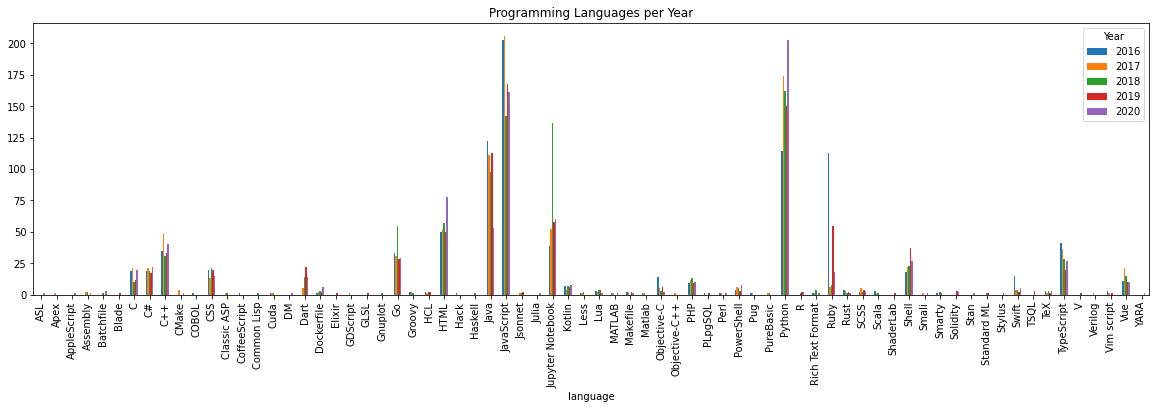

In [60]:
## plotting
# plt.figure(figsize=(20,50))

fig, ax = plt.subplots()

dx.unstack().plot(kind="bar", title="Programming Languages per Year", ax=ax, figsize=(20, 5))

ax.legend(["2016", "2017", "2018", "2019", "2020"], title="Year")

plt.show()

In [97]:
## filtering past three years
my_list = ["2018", "2019", "2020"]
filter_df  = df[df.index.year.isin(my_list)]

In [65]:
## aggregate data by language and year, then count the no of occuurences
new_dx = pd.DataFrame(filter_df.groupby(["language", filter_df.index.year])["language"].count())

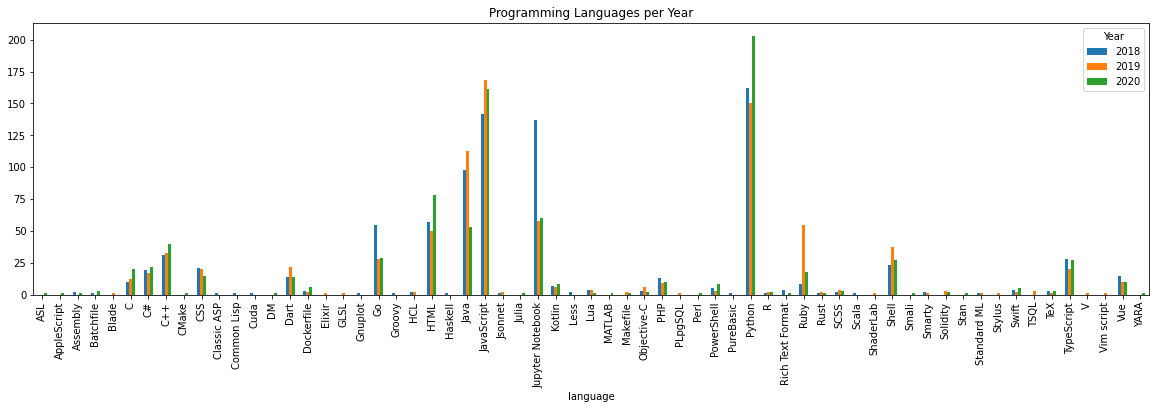

In [67]:
## plotting past three years data
# plt.figure(figsize=(20,50))

fig, ax = plt.subplots()

new_dx.unstack().plot(kind="bar", title="Programming Languages per Year", ax=ax, figsize=(20, 5))

ax.legend(["2018", "2019", "2020"], title="Year")

plt.show()

In [96]:
## Programming Languages used in top technologies
tech_lst = ["practice", "open source", "deep learning", "machine learning", "software"]

for tech in tech_lst:
    print(tech)
    print(set(df[df["clean"].str.contains(tech)]["language"]))
    print("\n")

practice
{nan, 'JavaScript', 'Python', 'CSS', 'Java', 'Jupyter Notebook', 'Kotlin', 'Dart', 'Shell', 'HTML', 'Go'}


open source
{nan, 'JavaScript', 'C#', 'C', 'Python', 'Ruby', 'Java', 'PHP', 'Jupyter Notebook', 'Rich Text Format', 'TypeScript', 'PowerShell', 'GDScript', 'CSS', 'Swift', 'Shell', 'HTML', 'Perl', 'Go', 'Scala', 'C++', 'Kotlin'}


deep learning
{nan, 'Scala', 'Python', 'C++', 'PureBasic', 'TeX', 'Java', 'Jupyter Notebook', 'HTML'}


machine learning
{nan, 'PowerShell', 'JavaScript', 'Python', 'Jsonnet', 'C++', 'C#', 'CSS', 'PureBasic', 'Java', 'PHP', 'Jupyter Notebook', 'HTML', 'C'}


software
{nan, 'JavaScript', 'V', 'Python', 'C++', 'C#', 'Lua', 'Java', 'PHP', 'Jupyter Notebook', 'Shell', 'HTML', 'C'}




In [98]:
## Programming Languages used in top technologies
tech_lst = ["practice", "open source", "deep learning", "machine learning", "software"]

for tech in tech_lst:
    print(tech)
    print(set(filter_df[filter_df["clean"].str.contains(tech)]["language"]))
    print("\n")

practice
{nan, 'JavaScript', 'Python', 'Java', 'Kotlin', 'Dart', 'Shell'}


open source
{nan, 'PowerShell', 'JavaScript', 'Python', 'C++', 'C#', 'CSS', 'Java', 'PHP', 'Jupyter Notebook', 'Shell', 'HTML', 'C', 'Go'}


deep learning
{nan, 'Python', 'C++', 'PureBasic', 'TeX', 'Jupyter Notebook'}


machine learning
{nan, 'PowerShell', 'Python', 'C#', 'CSS', 'Java', 'Jupyter Notebook', 'HTML'}


software
{'JavaScript', 'V', 'Python', 'C++', 'Java', 'Jupyter Notebook', 'HTML'}




#### Top repo by technologies

In [99]:
tech_lst = ["practice", "open source", "deep learning", "machine learning", "software"]

result = df.sort_values(by="watchers_count", ascending=False)

for tech in tech_lst:
    subset = result[result["clean"].str.contains(tech)].head(5)
    print(tech)
    for i,line in subset.iterrows():
        print(line["name"])
        print(line["description"])
        print("\n")

practice
nodebestpractices
:white_check_mark:  The Node.js best practices list (December 2020)


project-guidelines
A set of best practices for JavaScript projects


lighthouse
Automated auditing, performance metrics, and best practices for the web.


eng-practices
Google's Engineering Practices documentation


Paddle
PArallel Distributed Deep LEarning: Machine Learning Framework from Industrial Practice （『飞桨』核心框架，深度学习&机器学习高性能单机、分布式训练和跨平台部署）


open source
freecodecamp.cn
FCC China open source codebase and curriculum. Learn to code and help nonprofits.


open-source-mac-os-apps
🚀 Awesome list of open source applications for macOS. https://t.me/opensourcemacosapps


openpilot
openpilot is an open source driver assistance system. openpilot performs the functions of Automated Lane Centering and Adaptive Cruise Control for over 85 supported car makes and models.


docusaurus
Easy to maintain open source documentation websites.


joplin
Joplin - an open source note taking and to-do applicati

#### Compare tech by forks, watchers count, open issues and size

##### past 5 year data 

In [300]:
## creating a suitable data frame
tmpdf1 = df[df["clean"].str.contains("deep learning")][["stargazers_count","watchers_count", "forks_count", "open_issues_count", "size"]]
tmpdf2 = df[df["clean"].str.contains("open source")][["stargazers_count","watchers_count", "forks_count", "open_issues_count", "size"]]

tmpdf1["tech"] = "deep learning"
tmpdf2["tech"] = "open source"

In [301]:
new_df = pd.concat([tmpdf1, tmpdf2], axis=0)
new_df

,stargazers_count,watchers_count,forks_count,open_issues_count,size,tech
created_at,,,,,,
2020-02-27 07:11:46+00:00,3029,3029,727,4,33326,deep learning
2020-05-01 07:45:20+00:00,1797,1797,616,5,60234,deep learning
2020-02-11 08:43:48+00:00,1780,1780,341,46,284855,deep learning
2020-02-24 23:59:44+00:00,1990,1990,336,2,3555,deep learning
2020-02-11 08:43:48+00:00,1780,1780,341,46,284855,deep learning
...,...,...,...,...,...,...
2016-11-05 04:22:54+00:00,3707,3707,987,18,119148,open source
2016-02-18 21:16:19+00:00,5103,5103,975,306,67402,open source
2016-10-06 08:46:29+00:00,3466,3466,958,209,250260,open source


In [302]:
## Computing statistics
new_df.groupby("tech").mean()

,stargazers_count,watchers_count,forks_count,open_issues_count,size
tech,,,,,
deep learning,5585.285714,5585.285714,1810.937500,108.553571,92191.053571
open source,5395.083333,5395.083333,1762.041667,295.437500,279728.770833


In [247]:
new_df.groupby("tech").min()

,stargazers_count,watchers_count,forks_count,open_issues_count,size
tech,,,,,
deep learning,11,11,97,0,0
open source,4,4,112,0,222


In [303]:
new_df.groupby("tech").max()

,stargazers_count,watchers_count,forks_count,open_issues_count,size
tech,,,,,
deep learning,30344,30344,11779,2357,1806645
open source,36706,36706,33313,5867,12195805


###### past 3 years data

In [249]:
## creating a suitable data frame
tmpdf1 = filter_df[filter_df["clean"].str.contains("deep learning")][["stargazers_count","watchers_count", "forks_count", "open_issues_count", "size"]]
tmpdf2 = filter_df[filter_df["clean"].str.contains("open source")][["stargazers_count","watchers_count", "forks_count", "open_issues_count", "size"]]

tmpdf1["tech"] = "deep learning"
tmpdf2["tech"] = "open source"

In [291]:
new_filter_df = pd.concat([tmpdf1, tmpdf2], axis=0)
new_filter_df

,stargazers_count,watchers_count,forks_count,open_issues_count,size,tech
created_at,,,,,,
2020-02-27 07:11:46+00:00,3029,3029,727,4,33326,deep learning
2020-05-01 07:45:20+00:00,1797,1797,616,5,60234,deep learning
2020-02-11 08:43:48+00:00,1780,1780,341,46,284855,deep learning
2020-02-24 23:59:44+00:00,1990,1990,336,2,3555,deep learning
2020-02-11 08:43:48+00:00,1780,1780,341,46,284855,deep learning
...,...,...,...,...,...,...
2018-05-27 13:45:02+00:00,3799,3799,626,5,29453,open source
2018-09-13 04:43:31+00:00,1802,1802,615,11,4544,open source
2018-11-22 05:19:30+00:00,8844,8844,592,75,37143,open source


In [292]:
## Computing statistics
new_filter_df.groupby("tech").mean()

,stargazers_count,watchers_count,forks_count,open_issues_count,size
tech,,,,,
deep learning,3532.269841,3532.269841,1175.126984,46.142857,74500.015873
open source,2540.000000,2540.000000,662.387755,142.061224,148103.224490


In [293]:
new_filter_df.groupby("tech").min()

,stargazers_count,watchers_count,forks_count,open_issues_count,size
tech,,,,,
deep learning,11,11,97,0,0
open source,4,4,112,0,222


In [294]:
new_filter_df.groupby("tech").max()

,stargazers_count,watchers_count,forks_count,open_issues_count,size
tech,,,,,
deep learning,12463,12463,8425,288,958326
open source,8844,8844,1910,1016,1896062


##### Comparisions

In [282]:
dict(zip(set(new_df["tech"]), ["red", "blue"]))

{'open source': 'red', 'deep learning': 'blue'}

In [306]:
# print(new_df.shape)
# print(new_filter_df.shape)

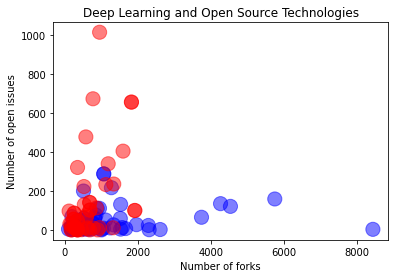

In [307]:
## Forks vs Open issues
dx = new_filter_df["forks_count"]
dy = new_filter_df["open_issues_count"]

fig, ax = plt.subplots()
colors = dict(zip(set(new_filter_df["tech"]), ["red", "blue"]))
ax.scatter(x=dx, y=dy, c = new_filter_df["tech"].apply(lambda x:colors[x]), s=200, alpha=0.5)
ax.set(title="Deep Learning and Open Source Technologies", xlabel="Number of forks", ylabel="Number of open issues")

plt.show()

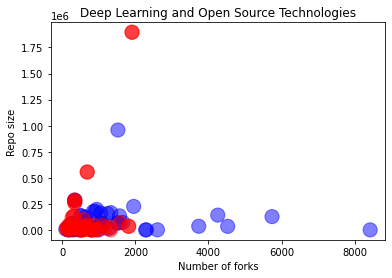

In [309]:
## Forks vs Size
dx = new_filter_df["forks_count"]
dy = new_filter_df["size"]

fig, ax = plt.subplots()
colors = dict(zip(set(new_filter_df["tech"]), ["red", "blue"]))
ax.scatter(x=dx, y=dy, c = new_filter_df["tech"].apply(lambda x:colors[x]), s=200, alpha=0.5)
ax.set(title="Deep Learning and Open Source Technologies", xlabel="Number of forks", ylabel="Repo size")

plt.show()

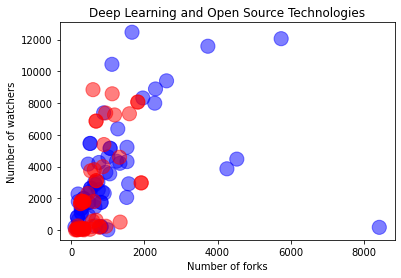

In [310]:
## Forks vs Watchers
dx = new_filter_df["forks_count"]
dy = new_filter_df["watchers_count"]

fig, ax = plt.subplots()
colors = dict(zip(set(new_filter_df["tech"]), ["red", "blue"]))
ax.scatter(x=dx, y=dy, c = new_filter_df["tech"].apply(lambda x:colors[x]), s=200, alpha=0.5)
ax.set(title="Deep Learning and Open Source Technologies", xlabel="Number of forks", ylabel="Number of watchers")

plt.show()

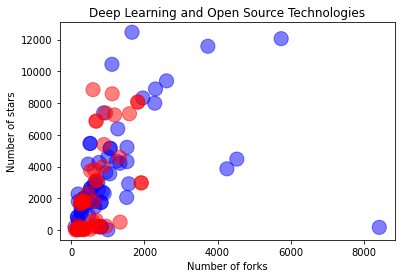

In [314]:
## Forks vs stars
dx = new_filter_df["forks_count"]
dy = new_filter_df["stargazers_count"]

fig, ax = plt.subplots()
colors = dict(zip(set(new_filter_df["tech"]), ["red", "blue"]))
ax.scatter(x=dx, y=dy, c = new_filter_df["tech"].apply(lambda x:colors[x]), s=200, alpha=0.5)
ax.set(title="Deep Learning and Open Source Technologies", xlabel="Number of forks", ylabel="Number of stars")

plt.show()

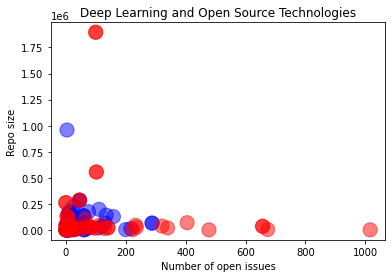

In [311]:
## Open issuues vs Size
dx = new_filter_df["open_issues_count"]
dy = new_filter_df["size"]

fig, ax = plt.subplots()
colors = dict(zip(set(new_filter_df["tech"]), ["red", "blue"]))
ax.scatter(x=dx, y=dy, c = new_filter_df["tech"].apply(lambda x:colors[x]), s=200, alpha=0.5)
ax.set(title="Deep Learning and Open Source Technologies", xlabel="Number of open issues", ylabel="Repo size")

plt.show()

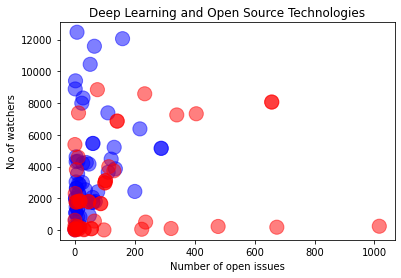

In [312]:
## Open issuues vs Watchers
dx = new_filter_df["open_issues_count"]
dy = new_filter_df["watchers_count"]

fig, ax = plt.subplots()
colors = dict(zip(set(new_filter_df["tech"]), ["red", "blue"]))
ax.scatter(x=dx, y=dy, c = new_filter_df["tech"].apply(lambda x:colors[x]), s=200, alpha=0.5)
ax.set(title="Deep Learning and Open Source Technologies", xlabel="Number of open issues", ylabel="No of watchers")

plt.show()

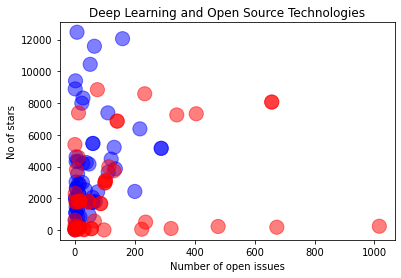

In [315]:
## Open issuues vs stars
dx = new_filter_df["open_issues_count"]
dy = new_filter_df["stargazers_count"]

fig, ax = plt.subplots()
colors = dict(zip(set(new_filter_df["tech"]), ["red", "blue"]))
ax.scatter(x=dx, y=dy, c = new_filter_df["tech"].apply(lambda x:colors[x]), s=200, alpha=0.5)
ax.set(title="Deep Learning and Open Source Technologies", xlabel="Number of open issues", ylabel="No of stars")

plt.show()

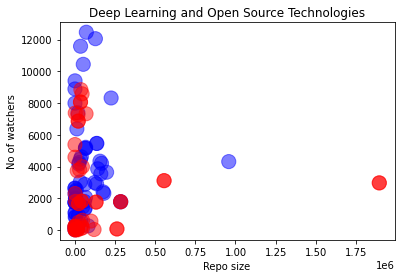

In [313]:
## Size vs Watchers
dx = new_filter_df["size"]
dy = new_filter_df["watchers_count"]

fig, ax = plt.subplots()
colors = dict(zip(set(new_filter_df["tech"]), ["red", "blue"]))
ax.scatter(x=dx, y=dy, c = new_filter_df["tech"].apply(lambda x:colors[x]), s=200, alpha=0.5)
ax.set(title="Deep Learning and Open Source Technologies", xlabel="Repo size", ylabel="No of watchers")

plt.show()

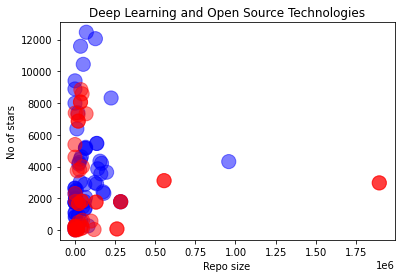

In [316]:
## Size vs Stars
dx = new_filter_df["size"]
dy = new_filter_df["stargazers_count"]

fig, ax = plt.subplots()
colors = dict(zip(set(new_filter_df["tech"]), ["red", "blue"]))
ax.scatter(x=dx, y=dy, c = new_filter_df["tech"].apply(lambda x:colors[x]), s=200, alpha=0.5)
ax.set(title="Deep Learning and Open Source Technologies", xlabel="Repo size", ylabel="No of stars")

plt.show()

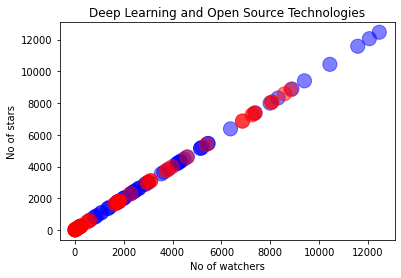

In [317]:
## Watchers vs Stars
dx = new_filter_df["watchers_count"]
dy = new_filter_df["stargazers_count"]

fig, ax = plt.subplots()
colors = dict(zip(set(new_filter_df["tech"]), ["red", "blue"]))
ax.scatter(x=dx, y=dy, c = new_filter_df["tech"].apply(lambda x:colors[x]), s=200, alpha=0.5)
ax.set(title="Deep Learning and Open Source Technologies", xlabel="No of watchers", ylabel="No of stars")

plt.show()

##### trash

In [127]:
# convert clean descrpitons to list of tokens
list_doc = df["clean"].apply(lambda x:x.split()).to_list()

## Anlaysis on docs
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents(list_doc)

bigram_finder.apply_freq_filter(3)

bigrams = bigram_finder.nbest(bigram_measures.raw_freq, 100)

In [131]:
## getting all of the technologies
technologies = []
for tup in bigrams[:20]:
    technologies.append(" ".join(tup))

#####  Saving data

In [50]:
## saving data to csv file
df.to_csv("../data/gh-data.csv")

In [52]:
## loading data
df = pd.read_csv("../data/gh-data.csv")

In [ ]:
## for mutltiple years 
# new_df["year"] = new_df["created_at"].apply(lambda x:x.split("T")[0].split("-")[0])

In [ ]:
# print(f"Data count each year\n2020: {(new_df['year'] == '2020').sum()}\n2019: {(new_df['year'] == '2019').sum()}\n2018: {(new_df['year'] == '2018').sum()}")